# Lane Detection with OpenCV

Work on detecting a lane in a representative still image. This way I can focus entirely on the foreign world of OpenCV without adding the complexity of "How does this fit into ROS?".

In [1]:
# %config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

from __future__ import print_function
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Apparently, SNS stands for "Samuel Norman Seaborn", a fictional
# character from The West Wing
import seaborn as sns

sns.set(style='white')

image shape: (400, 640, 3)


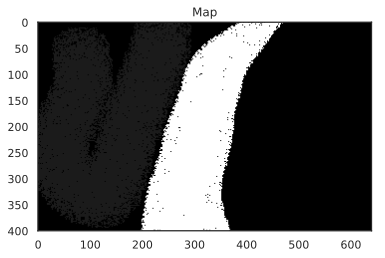

In [2]:
img = cv2.imread('map.png')
print('image shape:', img.shape)
plt.title('Map')
plt.imshow(img)
plt.show()

centroid: 315 213


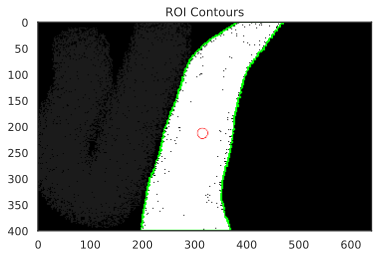

In [3]:
# Leave the image uncropped for now because I don't know the exact size yet.
cropped_image = img[:, :]
# Convert the image to grayscale
grayscale = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
# Blur the image
blurred = cv2.GaussianBlur(grayscale, (5, 5), 0)
# Threshold grays
ret, thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)
# Find the contours in the ROI
cont_image, contours, hierarchy = cv2.findContours(thresh, 1, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    c = max(contours, key=cv2.contourArea)
    M = cv2.moments(c)

    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    print('centroid:', cx, cy)

    cv2.drawContours(cropped_image, contours, -1, (0, 255, 0), 2)
    cv2.circle(cropped_image, (cx, cy), 10, (255, 0, 0), lineType=cv2.LINE_AA)

    plt.title('ROI Contours')
    plt.imshow(cropped_image)
    plt.show()